In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1. Load Data

In [61]:
def load_data(file_path: str, sortby: list) -> pd.DataFrame:
    frame = pd.read_csv(file_path, header=0)
    # sort by date
    frame = frame.sort_values(by=sortby)
    # drop duplicates
    frame = frame.drop_duplicates(subset=sortby, keep='first')
    # drop rows with missing open price
    frame = frame.dropna(subset=['open'])
    # reset index
    frame = frame.reset_index(drop=True)
    return frame

In [62]:
file_path = f'../data/combinedData/combined.csv'
raw_frame = load_data(file_path, ['stock', 'date', 'time'])
raw_frame

,stock,date,time,sentiment,year,month,day,open,high,low,close,adj_close,volume
0,AAPL,2023-02-28,09:15:41,inconclusive,2023,2,28,147.050003,149.080002,146.830002,147.410004,146.627350,50547000.0
1,AAPL,2023-02-28,13:06:20,inconclusive,2023,2,28,147.050003,149.080002,146.830002,147.410004,146.627350,50547000.0
2,AAPL,2023-03-01,13:03:10,inconclusive,2023,3,1,146.830002,147.229996,145.009995,145.309998,144.538498,55479000.0
3,AAPL,2023-03-01,15:10:37,inconclusive,2023,3,1,146.830002,147.229996,145.009995,145.309998,144.538498,55479000.0
4,AAPL,2023-03-01,18:55:50,inconclusive,2023,3,1,146.830002,147.229996,145.009995,145.309998,144.538498,55479000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6830,TSLA,2024-02-17,11:33:13,inconclusive,2024,2,17,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0
6831,TSLA,2024-02-17,23:54:01,false,2024,2,17,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0
6832,TSLA,2024-02-18,00:21:33,true,2024,2,18,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0
6833,TSLA,2024-02-18,10:33:01,inconclusive,2024,2,18,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0


In [63]:
file_path = f'../data/combinedData/collapsed.csv'
date_frame = load_data(file_path, ['stock', 'date'])
date_frame

,stock,date,senti_raise,senti_drop,senti_inconclusive,year,month,day,open,high,low,close,adj_close,volume
0,AAPL,2023-02-28,0,0,2,2023,2,28,147.050003,149.080002,146.830002,147.410004,146.627350,50547000.0
1,AAPL,2023-03-01,0,0,3,2023,3,1,146.830002,147.229996,145.009995,145.309998,144.538498,55479000.0
2,AAPL,2023-03-02,0,1,2,2023,3,2,144.380005,146.710007,143.899994,145.910004,145.135330,52238100.0
3,AAPL,2023-03-03,3,0,2,2023,3,3,148.039993,151.110001,147.330002,151.029999,150.228119,70732300.0
4,AAPL,2023-03-04,0,0,2,2023,3,4,148.039993,151.110001,147.330002,151.029999,150.228119,70732300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,TSLA,2024-02-14,0,0,1,2024,2,14,185.300003,188.889999,183.350006,188.710007,188.710007,81203000.0
2086,TSLA,2024-02-15,4,1,5,2024,2,15,189.160004,200.880005,188.860001,200.449997,200.449997,120831800.0
2087,TSLA,2024-02-16,1,0,2,2024,2,16,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0
2088,TSLA,2024-02-17,0,2,1,2024,2,17,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0


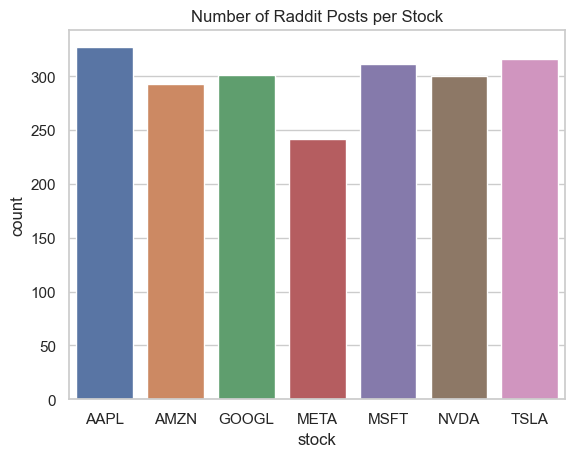

In [64]:
sns.set(style="whitegrid")
ax = sns.countplot(x='stock', data=date_frame)
plt.title('Number of Raddit Posts per Stock')
plt.show()

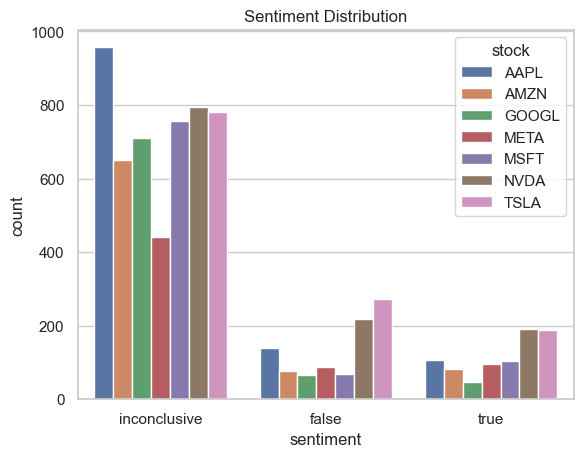

In [65]:
sns.countplot(x='sentiment', data=raw_frame, hue='stock')
plt.title('Sentiment Distribution')
plt.show()

### Step 2 Data filtering

In [66]:
# drop rows with inconclusive sentiment
raw_concl_frame = raw_frame[raw_frame.sentiment != 'inconclusive']
raw_concl_frame

,stock,date,time,sentiment,year,month,day,open,high,low,close,adj_close,volume
5,AAPL,2023-03-02,06:40:07,false,2023,3,2,144.380005,146.710007,143.899994,145.910004,145.135330,52238100.0
9,AAPL,2023-03-03,13:27:15,true,2023,3,3,148.039993,151.110001,147.330002,151.029999,150.228119,70732300.0
10,AAPL,2023-03-03,13:28:34,true,2023,3,3,148.039993,151.110001,147.330002,151.029999,150.228119,70732300.0
12,AAPL,2023-03-03,18:07:33,true,2023,3,3,148.039993,151.110001,147.330002,151.029999,150.228119,70732300.0
18,AAPL,2023-03-06,13:12:04,true,2023,3,6,153.789993,156.300003,153.460007,153.830002,153.013275,87558000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6824,TSLA,2024-02-15,21:21:38,true,2024,2,15,189.160004,200.880005,188.860001,200.449997,200.449997,120831800.0
6826,TSLA,2024-02-16,17:04:32,true,2024,2,16,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0
6829,TSLA,2024-02-17,07:40:48,false,2024,2,17,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0
6831,TSLA,2024-02-17,23:54:01,false,2024,2,17,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0


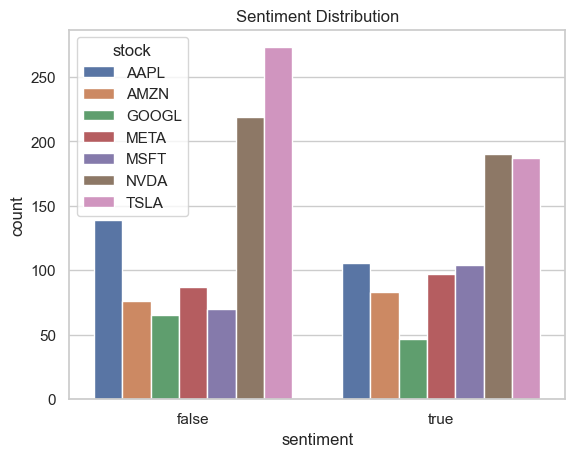

In [67]:
sns.countplot(x='sentiment', data=raw_concl_frame, hue='stock')
plt.title('Sentiment Distribution')
plt.show()

In [69]:
# Filter to include only the rows with either positive or negative sentiments
date_concl_frame = date_frame[date_frame.senti_raise + date_frame.senti_drop > 0]
date_concl_frame

,stock,date,senti_raise,senti_drop,senti_inconclusive,year,month,day,open,high,low,close,adj_close,volume
2,AAPL,2023-03-02,0,1,2,2023,3,2,144.380005,146.710007,143.899994,145.910004,145.135330,52238100.0
3,AAPL,2023-03-03,3,0,2,2023,3,3,148.039993,151.110001,147.330002,151.029999,150.228119,70732300.0
6,AAPL,2023-03-06,3,0,3,2023,3,6,153.789993,156.300003,153.460007,153.830002,153.013275,87558000.0
7,AAPL,2023-03-07,1,0,3,2023,3,7,153.699997,154.029999,151.130005,151.600006,150.795105,56182000.0
8,AAPL,2023-03-08,1,0,1,2023,3,8,152.809998,153.470001,151.830002,152.869995,152.058350,47204800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,TSLA,2024-02-11,0,1,0,2024,2,11,190.179993,194.119995,189.479996,193.570007,193.570007,84476300.0
2086,TSLA,2024-02-15,4,1,5,2024,2,15,189.160004,200.880005,188.860001,200.449997,200.449997,120831800.0
2087,TSLA,2024-02-16,1,0,2,2024,2,16,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0
2088,TSLA,2024-02-17,0,2,1,2024,2,17,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0


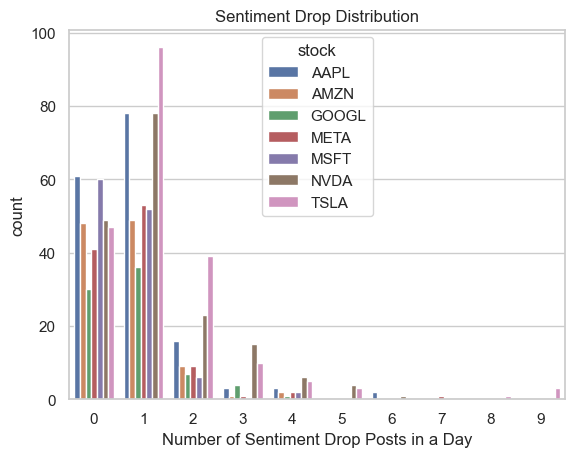

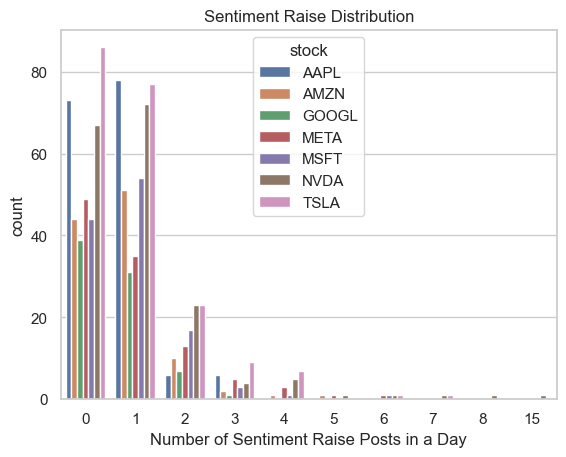

In [74]:
def plot_senti_distr(frame: pd.DataFrame, x: str, xlabel: str, title: str):
    sns.countplot(x=x, data=frame, hue='stock')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

plot_senti_distr(date_concl_frame, 'senti_drop', 'Number of Sentiment Drop Posts in a Day', 'Sentiment Drop Distribution')
plot_senti_distr(date_concl_frame, 'senti_raise', 'Number of Sentiment Raise Posts in a Day', 'Sentiment Raise Distribution')


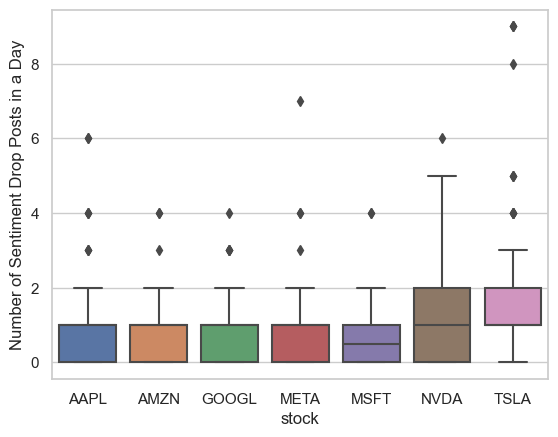

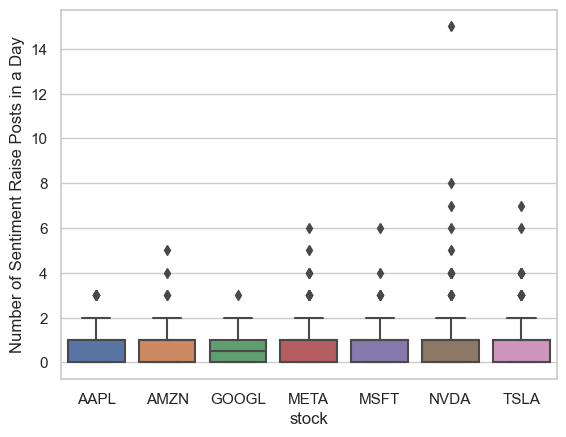

In [77]:
sns.boxplot(x='stock', y='senti_drop', data=date_concl_frame)
plt.ylabel('Number of Sentiment Drop Posts in a Day')
plt.show()
sns.boxplot(x='stock', y='senti_raise', data=date_concl_frame)
plt.ylabel('Number of Sentiment Raise Posts in a Day')
plt.show()

### Step 3. Calculate stock price change

In [78]:
def add_price_change(df: pd.DataFrame):
    # Calculate price change
    df.loc[:, 'price_drop'] = (df['open'] > df['close'])
    df.loc[:, 'price_raise'] = (df['open'] < df['close'])
    df.loc[:, 'price_change_type'] = df[['price_drop', 'price_raise']].idxmax(axis=1)
    df.loc[:, 'price_change'] = df['close'] - df['open']
    df.loc[:, 'price_change_percent'] = df['price_change'] / df['open'] * 100

In [84]:
add_price_change(raw_concl_frame)
raw_concl_frame
add_price_change(date_concl_frame)
date_concl_frame

C:\Users\zhangy3\AppData\Local\Temp\ipykernel_140928\1149525241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'price_drop'] = (df['open'] > df['close'])
C:\Users\zhangy3\AppData\Local\Temp\ipykernel_140928\1149525241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'price_raise'] = (df['open'] < df['close'])
C:\Users\zhangy3\AppData\Local\Temp\ipykernel_140928\1149525241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,stock,date,senti_raise,senti_drop,senti_inconclusive,year,month,day,open,high,low,close,adj_close,volume,price_drop,price_raise,price_change_type,price_change,price_change_percent
2,AAPL,2023-03-02,0,1,2,2023,3,2,144.380005,146.710007,143.899994,145.910004,145.135330,52238100.0,False,True,price_raise,1.529999,1.059703
3,AAPL,2023-03-03,3,0,2,2023,3,3,148.039993,151.110001,147.330002,151.029999,150.228119,70732300.0,False,True,price_raise,2.990006,2.019729
6,AAPL,2023-03-06,3,0,3,2023,3,6,153.789993,156.300003,153.460007,153.830002,153.013275,87558000.0,False,True,price_raise,0.040009,0.026015
7,AAPL,2023-03-07,1,0,3,2023,3,7,153.699997,154.029999,151.130005,151.600006,150.795105,56182000.0,True,False,price_drop,-2.099991,-1.366292
8,AAPL,2023-03-08,1,0,1,2023,3,8,152.809998,153.470001,151.830002,152.869995,152.058350,47204800.0,False,True,price_raise,0.059997,0.039262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,TSLA,2024-02-11,0,1,0,2024,2,11,190.179993,194.119995,189.479996,193.570007,193.570007,84476300.0,False,True,price_raise,3.390014,1.782529
2086,TSLA,2024-02-15,4,1,5,2024,2,15,189.160004,200.880005,188.860001,200.449997,200.449997,120831800.0,False,True,price_raise,11.289993,5.968488
2087,TSLA,2024-02-16,1,0,2,2024,2,16,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0,True,False,price_drop,-2.110001,-1.044245
2088,TSLA,2024-02-17,0,2,1,2024,2,17,202.059998,203.169998,197.399994,199.949997,199.949997,111173600.0,True,False,price_drop,-2.110001,-1.044245


<AxesSubplot:xlabel='price_change_type', ylabel='count'>

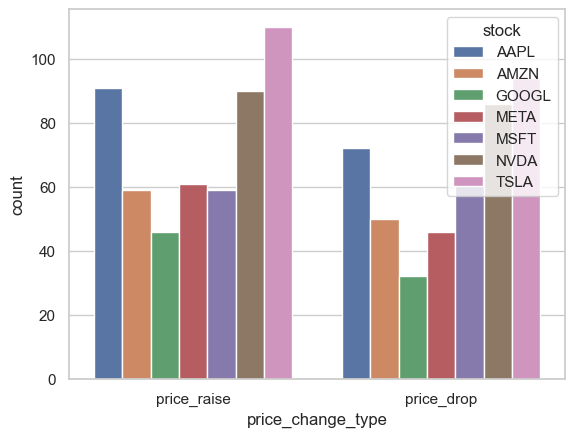

In [85]:
sns.countplot(x='price_change_type', data=date_concl_frame, hue='stock')

<AxesSubplot:xlabel='stock', ylabel='price_change_percent'>

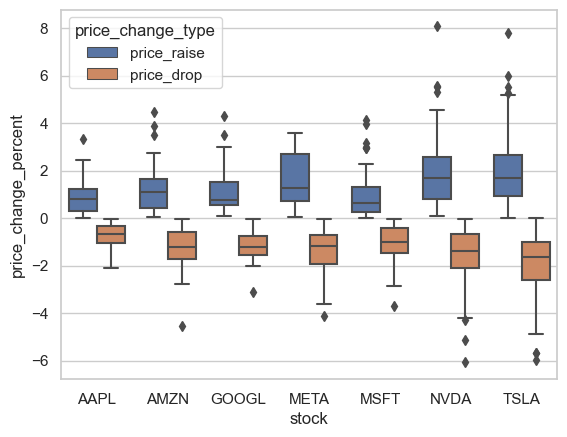

In [86]:
sns.boxplot(x='stock', y='price_change_percent', data=date_concl_frame, hue='price_change_type')

<AxesSubplot:title={'center':'Percentage Change in Stock Price'}, ylabel='Frequency'>

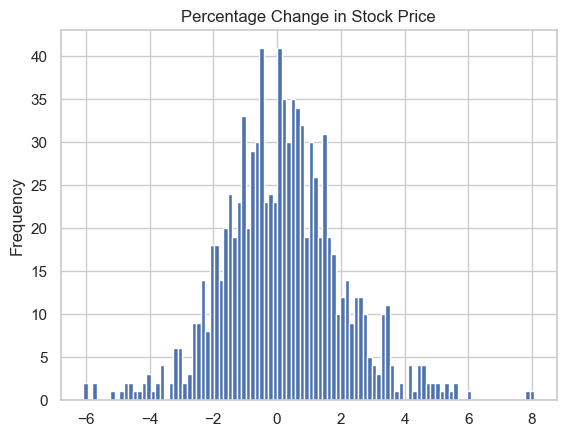

In [87]:
date_concl_frame['price_change_percent'].plot(kind='hist', bins=100, xlabel='Percentage Change', title='Percentage Change in Stock Price')

In [83]:
def add_sentiment(df):
    # Calculate sentiment
    df.loc[:, 'senti_drop'] = df['title'].str.contains('drop', case=False)
    df.loc[:, 'senti_raise'] = df['title'].str.contains('raise', case=False)
    df.loc[:, 'senti_inconclusive'] = df['title'].str.contains('inconclusive', case=False)
    df.loc[:, 'senti_change_type'] = df[['senti_drop', 'senti_raise', 'senti_inconclusive']].idxmax(axis=1)
    df.loc[:, 'senti_total'] = df['senti_raise'] + df['senti_drop'] + df['senti_inconclusive']
    df.loc[:, 'senti_diff'] = df['senti_raise'] - df['senti_drop']
    df.loc[:, 'positive'] = (df['senti_diff'] > 0)
    df.loc[:, 'negative'] = (df['senti_diff'] < 0)
    df.loc[:, 'neutral'] = (df['senti_diff'] == 0)
    df.loc[:, 'sentiment'] = df[['positive', 'negative', 'neutral']].idxmax(axis=1)

### Step 4. Correlation Analysis

#### Scatter Plots

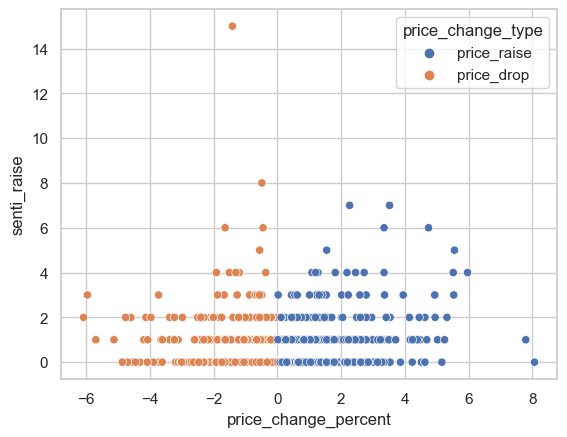

<AxesSubplot:xlabel='price_change_percent', ylabel='senti_drop'>

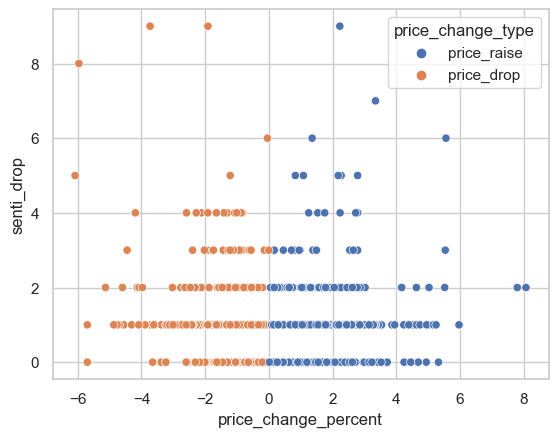

In [95]:
sns.scatterplot(data=date_concl_frame, y='senti_raise', x='price_change_percent', hue='price_change_type')
plt.show()
sns.scatterplot(data=date_concl_frame, y='senti_drop', x='price_change_percent', hue='price_change_type')

#### Strip Plots

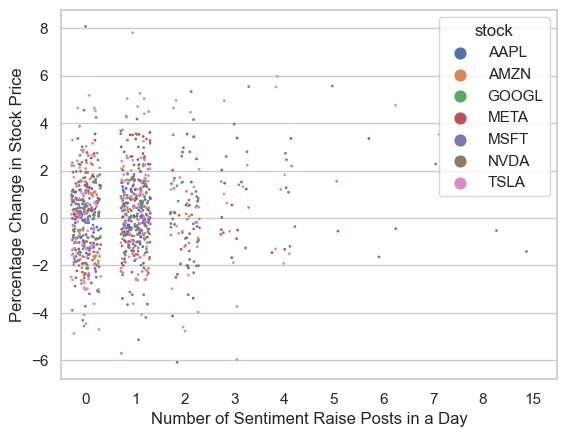

In [136]:
sns.stripplot(data=date_concl_frame, x="senti_raise", y="price_change_percent", jitter=0.3, size=2, hue='stock')
plt.xlabel('Number of Sentiment Raise Posts in a Day')
plt.ylabel('Percentage Change in Stock Price')
plt.show()

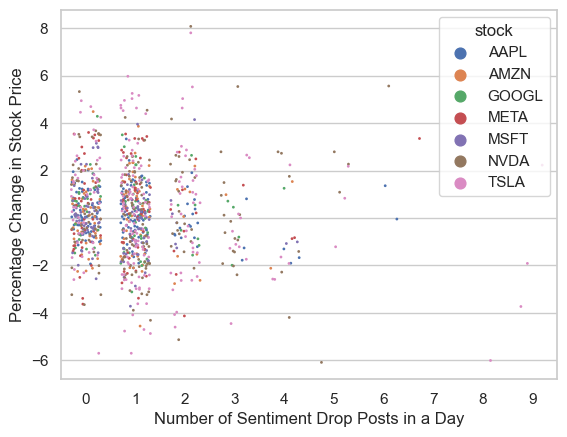

In [137]:
sns.stripplot(data=date_concl_frame, x="senti_drop", y="price_change_percent", jitter=0.3, size=2, hue='stock')
plt.xlabel('Number of Sentiment Drop Posts in a Day')
plt.ylabel('Percentage Change in Stock Price')
plt.show()

#### High quality set

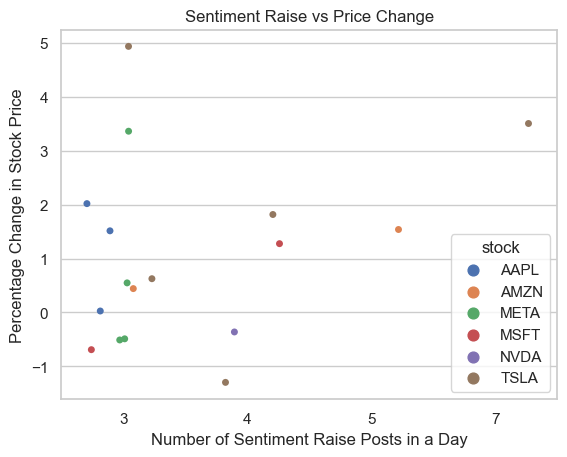

In [147]:
# Sentiment Raise vs Price Change
date_raise_frame = date_concl_frame[((date_concl_frame['senti_raise'] > 2) & (date_concl_frame['senti_raise'] < 10) & (date_concl_frame['senti_drop'] == 0))]
sns.stripplot(data=date_raise_frame, x="senti_raise", y="price_change_percent", jitter=0.3, size=5, hue='stock')
plt.xlabel('Number of Sentiment Raise Posts in a Day')
plt.ylabel('Percentage Change in Stock Price')
plt.title('Sentiment Raise vs Price Change')
plt.show()

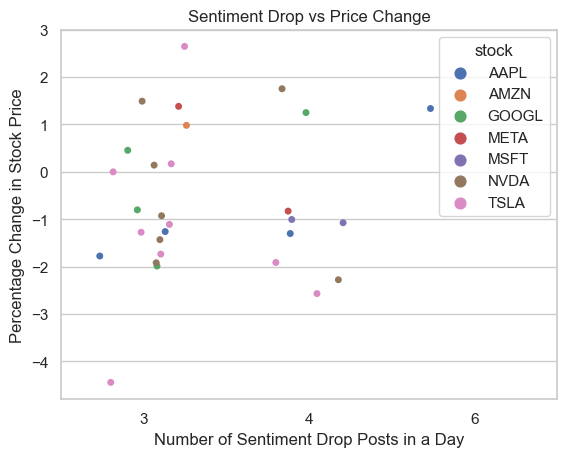

In [146]:
# Sentiment Drop vs Price Change
date_drop_frame = date_concl_frame[((date_concl_frame['senti_drop'] > 2) & (date_concl_frame['senti_drop'] < 10) & (date_concl_frame['senti_raise'] == 0))]
sns.stripplot(data=date_drop_frame, x="senti_drop", y="price_change_percent", jitter=0.3, size=5, hue='stock')
plt.xlabel('Number of Sentiment Drop Posts in a Day')
plt.ylabel('Percentage Change in Stock Price')
plt.title('Sentiment Drop vs Price Change')
plt.show()

In [142]:
def plot_stock(stock: str, frame: pd.DataFrame, x: str):
    stock_frame = frame[frame['stock'] == stock]
    sns.stripplot(data=stock_frame, x=x, y="price_change_percent", jitter=0.3, size=5, hue='stock')
    plt.xlabel(f'Number of Sentiment {x} Posts in a Day')
    plt.ylabel('Percentage Change in Stock Price')
    plt.title(f'Sentiment {x} vs Price Change')
    plt.show()

TSLA


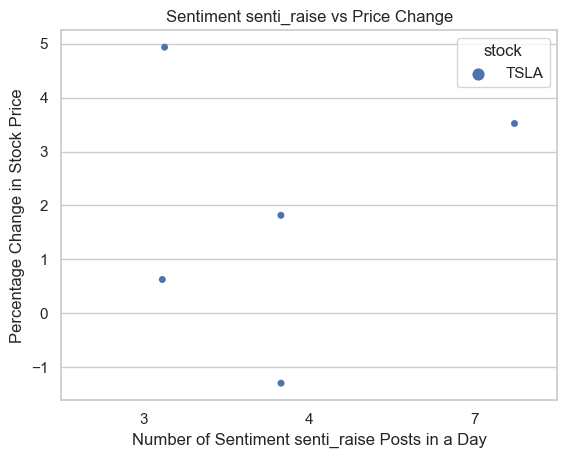

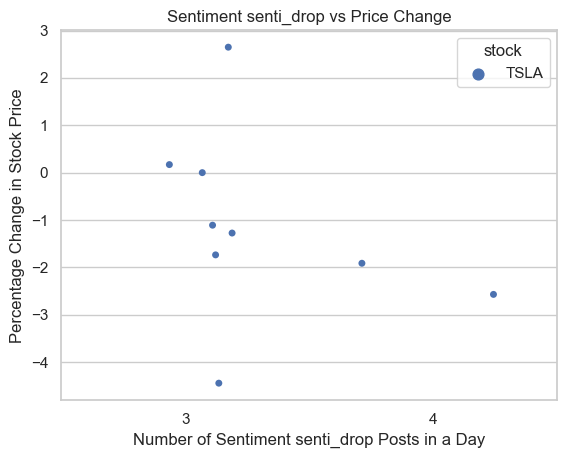

In [148]:
for stock in ['TSLA']:
    print (stock)
    plot_stock(stock, date_raise_frame, 'senti_raise')
    plot_stock(stock, date_drop_frame, 'senti_drop')